## dogs-vs-cats
### pandas df loads data

In [2]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from utils.data_utils import data_generators

In [9]:
from keras_fn.resnet import model_depth, resnet_v2, lr_schedule

In [3]:
# Data path
competition_name = "semi-conductor-image-classification-first"
data_dir = os.path.expanduser(
    f"~/.kaggle/competitions/{competition_name}")

In [21]:
image_size = (224, 224)
batch_size = 16

# Data loaders
train_generator, validation_generator = data_generators(
    data_dir, target_size=image_size, batch_size=batch_size)

print("Train class_indices: ", train_generator.class_indices)
print("Val class_indices: ", validation_generator.class_indices)

Found 24000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Train class_indices:  {'good_0': 0, 'bad_1': 1}
Val class_indices:  {'good_0': 0, 'bad_1': 1}


In [23]:
input_shape = image_size + (1, )
depth = 56

In [24]:
# Create model
model = resnet_v2(input_shape=input_shape, depth=depth, num_classes=2)

In [25]:
from tensorflow.keras.losses import BinaryCrossentropy
loss = BinaryCrossentropy()
# Compile model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision, TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, AUC

metrics = [
    Recall(name='recall'),
    Precision(name='precision'),
    TruePositives(name='tp'),  # thresholds=0.5
    FalsePositives(name='fp'),
    TrueNegatives(name='tn'),
    FalseNegatives(name='fn'),
    BinaryAccuracy(name='accuracy'),
    # AUC0(name='auc_cat_0'),
    AUC(name='auc_bad_1')  # 以 bad_1 为 positive 的 AUC
]

model.compile(loss=loss,
                optimizer=Adam(learning_rate=lr_schedule(0)),
                metrics=metrics)

Model has been trained for 0 epoch(s); learning rate for next epoch: 0.001.


In [26]:
images, labels = train_generator[0]

In [27]:
images.shape

(16, 224, 224, 1)

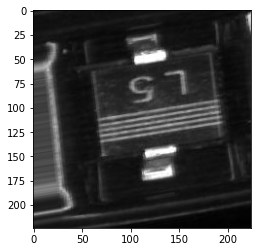

In [31]:
plt.imshow(images[0][...,0], cmap="gray")

In [34]:
model.predict(np.expand_dims(images[0], 0))

array([[1., 0.]], dtype=float32)

In [5]:
print(df.head())
print(df.tail())
df['category'].value_counts().plot.bar()
plt.show()

NameError: name 'df' is not defined

In [5]:
# Input parameters
IMAGE_WIDTH = IMAGE_HEIGHT = 128
image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2

batch_size = 32

# Data loaders
train_generator, validation_generator = data_generators(
    data_dir, target_size=image_size, batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


sample name: cat.247.jpg


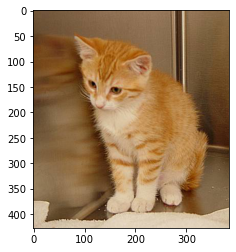

In [8]:
# Show sample image
sample = np.random.choice(filenames)
sample = "cat.247.jpg"
print(f"sample name: {sample}")
img = image.load_img(os.path.join(data_dir, "train", sample))
plt.imshow(img)
plt.show()

In [9]:
img.size

(384, 427)